<a href="https://colab.research.google.com/github/Amol1410/TwitterSentimentAnalysis/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the libraries**

In [1]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt

import re
import string
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split

## **Connecting the Twitter API**

In [2]:
# to connect as OAth handler or jump serever / revers proxy server
consumer_key = "NZJjdtvyZOQa3TO1rawPQa8SM"
consumer_secret = "LjdxqqfHMDy5YRcn5xB9NhDCEuYD0Ihn6FVgNVWRxvCdAFIk4i"

# from proxy server we need to connect
access_token = "1449341869494734849-m7v7gvcNralQ5z2jKmk8qN4rV1aNXV"
access_token_secret = "HJzmiUAQOoCpb4gmrtDn6BiAMctIwWccWnPbCZpL8Wfws"

In [3]:
# To connect jump server of twitter
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

# To connect from jump server to web server of twitter
auth.set_access_token(access_token,access_token_secret)

# To connect to API storge server of twitter
api_connect = tweepy.API(auth)

## **Collecting the Tweets**

In [4]:
# Enter the Keyword and no. of tweets
keyword = input("Enter Keyword : ")
noOfterms = input("How many tweets : ")

Enter Keyword : Rahul
How many tweets : 69


In [5]:
tweets = api_connect.search(keyword, count=noOfterms)

In [6]:
for tweet in tweets:
  print(tweet.text)
#tweets.text

RT @Nierbhaym: हमारे जीवन में अच्छे लोग खुशियां देते है, और 
कुछ लोग हमें सीखने का सबक देते है !!!

#हर____हर___महादेव 🙏
शुभ संध्या 🙏 https…
RT @JnuKarl: When someone asks you a series of posts on 

“ How to celebrate Miladi Nabi in a peaceful  way without any bloodshed of innoce…
RT @_Rishika_01: वादा करती हूँ 1OO फॉलोवर्स तुरंत पाए,

सिर्फ रिट्वीट करें रिट्वीट करने वालो को फॉलो करे !!
RT @SonyLIV: SonyLIV announces a new series Pulwama Key No. 1026, helmed by National award-winning director - Onir and based on award-winni…
RT @SNsinghmla: सरल सौम्य, तेजतर्रार, लोकप्रिय युवा साथी श्री
@AnujBajpai_ जी आपको जन्मदिन की बहुत बहुत बधाई एवं अनंत शुभकामनाएं । 

बाबा…
@Rahul_Rohit3 Yems 😎
RT @amitmalviya: Earlier a senior Congress beat reporter was turned out of Rahul Gandhi’s PC for asking a factual question, not even an unc…
@Rahul_ss73 Let's interact more....But I still feel bad for ya cause there's like 5 people who should not be in her… https://t.co/vdSniEk8WE
RT @IndianFootball: Midfiel

## **Preprocessing the Tweets**

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
for tweet in tweets:
  #to lowercase
  tweet = str(tweet.text).lower()

  # Removing URL
  tweet = re.sub(r"https\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)

  # Removing punctuations
  tweet = tweet.translate(str.maketrans("", "", string.punctuation))

  # Removing special characters
  tweet = re.sub(r'\@\w+|#', "", tweet)
  
  # Tokenization
  tweet_tokens = word_tokenize(tweet)
  filter_words = [word for word in tweet_tokens if word not in stop_words]

  # Stemming
  ps = PorterStemmer()
  stem_words = [ps.stem(w) for w in tweet_tokens]
  #for w in tweet_tokens:
  #  stem_words.append(PorterStemmer.stem(w))

  # Lemmatizing
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stem_words]

  tweet = " ".join(lemma_words)
  print(tweet)

rt nierbhaym हमारे जीवन में अच्छे लोग खुशियां देते है और कुछ लोग हमें सीखने का सबक देते है हरहरमहादेव 🙏 शुभ संध्या 🙏
rt jnukarl when someon ask you a seri of post on “ how to celebr miladi nabi in a peac way without ani bloodsh of innoce…
rt rishika01 वादा करती हूँ 1oo फॉलोवर्स तुरंत पाए सिर्फ रिट्वीट करें रिट्वीट करने वालो को फॉलो करे
rt sonyliv sonyliv announc a new seri pulwama key no 1026 helm by nation awardwin director onir and base on awardwinni…
rt snsinghmla सरल सौम्य तेजतर्रार लोकप्रिय युवा साथी श्री anujbajpai जी आपको जन्मदिन की बहुत बहुत बधाई एवं अनंत शुभकामनाएं । बाबा…
rahulrohit3 yem 😎
rt amitmalviya early a senior congress beat report wa turn out of rahul gandhi ’ s pc for ask a factual question not even an unc…
rahulss73 let interact morebut i still feel bad for ya caus there like 5 peopl who should not be in her…
rt indianfootbal midfield suresh singh amarjit singh lalengmawia jeakson singh deepak tangri rahul kp komal thatal nikhil raj…
inctamilnadu rahul gandhi garu 

## **Plotting Pie Chart and Bar Graph**

14 5 50


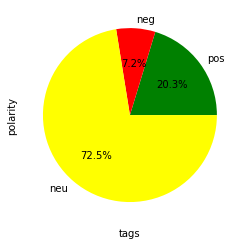

In [22]:
# Calculating no. of positive, negative and neutral tweets
pos=0
neg=0
neu=0

for tweet in tweets:
  #here it will apply NLP
  analysis = TextBlob(tweet.text)

  if analysis.sentiment.polarity > 0:
     pos=pos+1
  elif analysis.sentiment.polarity == 0 :
     neu=neu+1
  else :
     neg=neg+1
print(pos,neg,neu)  
# ploting graphs
plt.xlabel("tags")
plt.ylabel("polarity")
plt.pie([pos,neg,neu],labels=['pos','neg','neu'],autopct="%1.1f%%",colors=['green','red','yellow'])
#plt.pie([pos,neg,neu],labels=['pos','neg','neu'],autopct="%1.1f%%",colors=['green','green','green'])
plt.show()

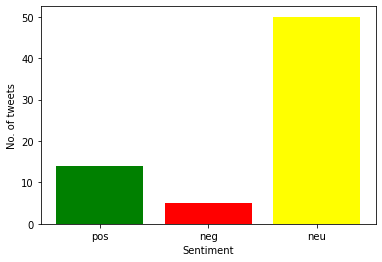

In [21]:
x = np.array(['pos','neg','neu'])
y = np.array([pos,neg,neu])

colors=['green','red','yellow']
plt.bar(x, y, color = colors)

plt.xlabel("Sentiment")
plt.ylabel("No. of tweets")
plt.show()